In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import six

In [2]:
def set_align_for_column(table, col, align="left"):
    cells = [key for key in table._cells if key[1] == col]
    for cell in cells:
        table._cells[cell]._loc = align

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#045FB4', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns,**kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    
    set_align_for_column(mpl_table, col=0, align="left")
    set_align_for_column(mpl_table, col=1, align="center")

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
            cell._loc = 'center'
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

# Recipes5K

## Dish Classes Distribution

In [3]:
dir_recipe5k = '../datasets/Recipes5K/'

dir_images = dir_recipe5k + 'images/'
dir_annotations = dir_recipe5k + 'annotations/'

train_dishes = open(dir_annotations+'train_images.txt','r')
train_index = open(dir_annotations+'train_labels.txt','r')

test_dishes = open(dir_annotations+'test_images.txt','r')
test_index = open(dir_annotations+'test_labels.txt','r')

val_dishes = open(dir_annotations+'val_images.txt','r')
val_index = open(dir_annotations+'val_labels.txt','r')

train_dish_name = train_dishes.readlines()
train_idxs = train_index.readlines()

test_dish_name = test_dishes.readlines()
test_idxs = test_index.readlines()

val_dish_name = val_dishes.readlines()
val_idxs = val_index.readlines()

labels = []

for i in range(len(train_idxs)):
    
    dish = train_dish_name[i].split('/')[0]
        
    labels.append(dish)
    
for i in range(len(test_idxs)):
    
    dish = test_dish_name[i].split('/')[0]
        
    labels.append(dish)
    
for i in range(len(val_idxs)):
    
    dish = val_dish_name[i].split('/')[0]
        
    labels.append(dish)

### Number of images per dish class

Trying to understand how balanced is the dataset it is difficult to visualize correctly how many images per dish there are due the large number of different dishes, 101 in the Recipes5K case. As a solution the alternative proposed is as follows.

Creating a dataframe with the number of images per each dish and visualize the histogram over it. In this way, it could be seen the dish class distribution per number of images. Ideally the graph would be just a bin with a value equal to the total number of different dishes, 101.  

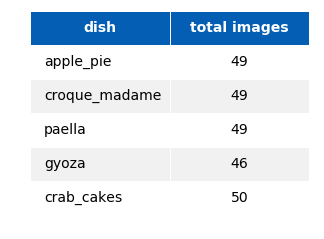

In [4]:
img_dish_df = pd.DataFrame(labels,columns = ['dish'])
img_dish_df['#'] = 1
img_total_dish_df = img_dish_df.merge(img_dish_df.groupby('dish').count(),right_index=True,left_on='dish')
img_total_dish_df = img_total_dish_df[['dish','#_y']].drop_duplicates().reset_index(drop=True).rename(columns={'#_y':'total images'})
table_recipes5k_dish = render_mpl_table(img_total_dish_df.head(),header_columns=0, col_width=2.5)
table_recipes5k_dish.figure.savefig('table_recipes5k_dishes.jpeg')

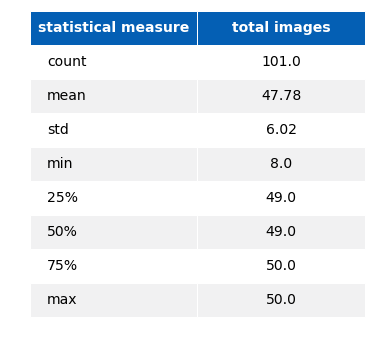

In [5]:
img_total_dish_describe_df = img_total_dish_df.describe().round(2)
img_total_dish_describe_df['statistical measure'] = img_total_dish_describe_df.index
table_recipes5k_dish_stats = render_mpl_table(img_total_dish_describe_df[['statistical measure','total images']],header_columns=0, col_width=3)
table_recipes5k_dish_stats.figure.savefig('table_recipes5k_dishes_stats.jpeg')

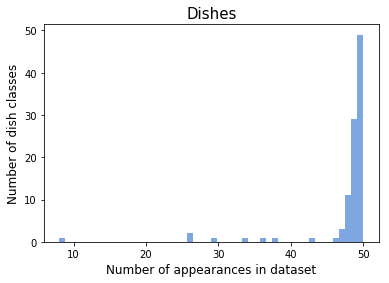

In [6]:
fig, ax = plt.subplots()
img_total_dish_df.hist(bins=50, grid=False, figsize=(8,5), color='#7EA6E0', ax=ax)
plt.xlabel("Number of appearances in dataset", fontsize=12)
plt.ylabel("Number of dish classes",fontsize=12)
plt.title("Dishes", fontsize=15)
fig.savefig('img_recipes5k_dish_hist.jpeg')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4bc11a240>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4bc11ab38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4bc11a0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4bc128438>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4bc128898>],
 'means': []}

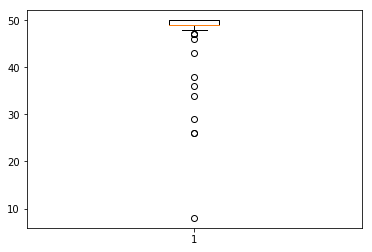

In [7]:
plt.boxplot(img_total_dish_df['total images'])

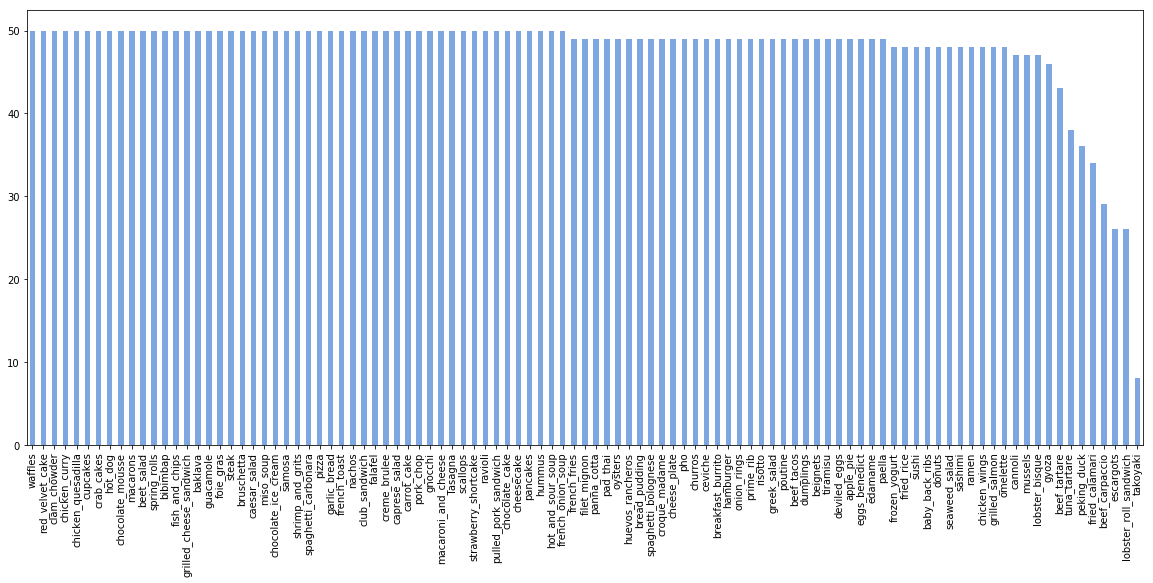

In [8]:
img_dish_df['dish'].value_counts().plot(kind='bar', figsize = (20,8), color='#7EA6E0')

## Ingredient Classes Distribution

Working with simplified ingredients

In [9]:
ingr_labels = []

f = open(dir_annotations + 'ingredients_simplified_Recipes5k.txt')

for line in f:
    for word in line.split(','):
        ingr_labels.append(word.replace('\n',''))

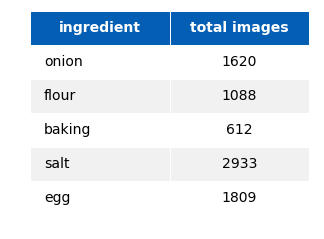

In [10]:
d = {'ingredient':ingr_labels, '#':np.ones(len(ingr_labels))}
img_ingr_df = pd.DataFrame(d)
img_total_ingr_df = img_ingr_df.merge(img_ingr_df.groupby('ingredient').count(), right_index=True,left_on='ingredient')
img_total_ingr_df = img_total_ingr_df[['ingredient','#_y']].drop_duplicates().reset_index(drop=True).rename(columns={'#_y':'total images'})
table_recipes5k_ingr = render_mpl_table(img_total_ingr_df.head(),header_columns=0, col_width=2.5)
table_recipes5k_ingr.figure.savefig('table_recipes5k_ingr.jpeg')

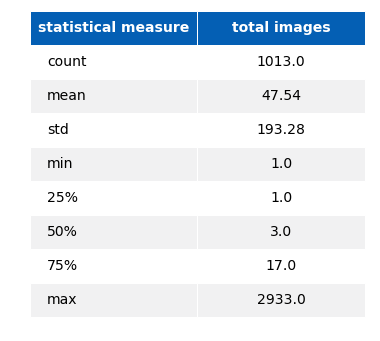

In [234]:
img_total_ingr_describe_df = img_total_ingr_df.describe().round(2)
img_total_ingr_describe_df['statistical measure'] = img_total_ingr_describe_df.index
table_recipes5k_ingr_stats = render_mpl_table(img_total_ingr_describe_df[['statistical measure','total images']],header_columns=0, col_width=3)
table_recipes5k_ingr_stats.figure.savefig('table_recipes5k_ingr_stats.jpeg')

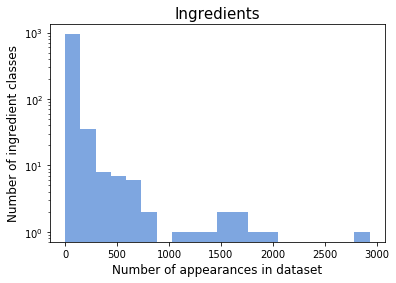

In [235]:
fig, ax = plt.subplots()
img_total_ingr_df.hist(bins=20, grid=False, figsize=(8,5), color='#7EA6E0', ax=ax)
plt.xlabel("Number of appearances in dataset", fontsize=12)
plt.ylabel("Number of ingredient classes",fontsize=12)
plt.title("Ingredients", fontsize=15)
plt.yscale('log')
fig.savefig('imgr_recipes5k_ingr_hist.jpeg')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6866f3208>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6866f3ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6866f30b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d68672a4a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d68672a908>],
 'means': []}

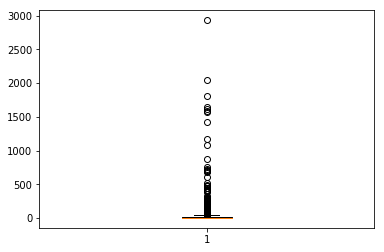

In [190]:
plt.boxplot(img_total_ingr_df['total images'])

# VireoFood172

## Dish Classes Distribution

In [236]:
dir_vireofood172 = '../datasets/VireoFood172/'

dir_images = dir_vireofood172 + 'images/'
dir_annotations = dir_vireofood172 + 'meta/'

dishes_list = open(dir_vireofood172+'FoodList.txt','r')
train_index = open(dir_annotations+'train_dish_lbls.txt','r')

test_index = open(dir_annotations+'test_dish_lbls.txt','r')

val_index = open(dir_annotations+'val_dish_lbls.txt','r')

dishes_lbls = dishes_list.readlines()

train_idxs = train_index.readlines()

test_idxs = test_index.readlines()

val_idxs = val_index.readlines()

labels = []

for i,lbl in enumerate(dishes_lbls):
    
    dishes_lbls[i] = lbl.replace('\n','')

for i in range(len(train_idxs)):
        
    dish_idx = train_idxs[i].replace('\n','') 
    labels.append(dishes_lbls[int(dish_idx)])
    
for i in range(len(test_idxs)):
        
    dish_idx = test_idxs[i].replace('\n','')
    labels.append(dishes_lbls[int(dish_idx)])
    
for i in range(len(val_idxs)):
    
    dish_idx = val_idxs[i].replace('\n','')
    labels.append(dishes_lbls[int(dish_idx)])

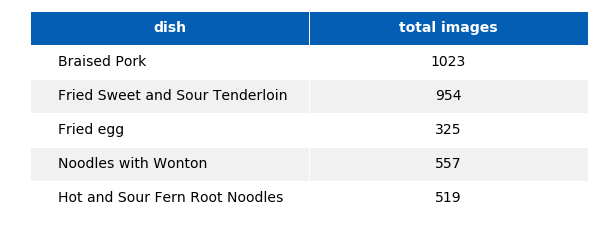

In [237]:
d = {'dish':labels, '#':np.ones(len(labels))}
img_dish_df = pd.DataFrame(d)
img_total_dish_df = img_dish_df.merge(img_dish_df.groupby('dish').count(), right_index=True,left_on='dish')
img_total_dish_df = img_total_dish_df[['dish','#_y']].drop_duplicates().reset_index(drop=True).rename(columns={'#_y':'total images'})
img_total_dish_df.loc[img_total_dish_df.dish == 'Fried egg_b','dish'] = 'Fried egg'
table_vireo172_dish = render_mpl_table(img_total_dish_df.head(),header_columns=0, col_width=5)
table_vireo172_dish.figure.savefig('table_vireo172_dish.jpeg')

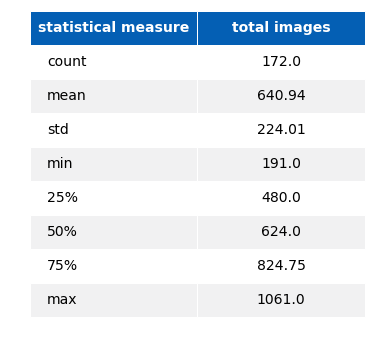

In [238]:
img_total_dish_describe_df = img_total_dish_df.describe().round(2)
img_total_dish_describe_df['statistical measure'] = img_total_dish_describe_df.index
table_vireo172_dish_stats = render_mpl_table(img_total_dish_describe_df[['statistical measure','total images']],header_columns=0, col_width=3)
table_vireo172_dish_stats.figure.savefig('table_vireo172_dish_stats.jpeg')

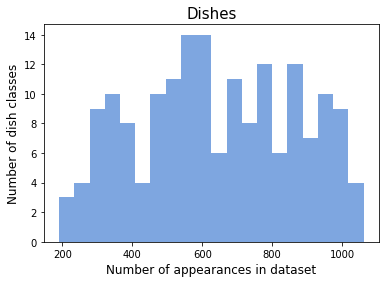

In [240]:
fig, ax = plt.subplots()
img_total_dish_df.hist(bins=20, grid=False, figsize=(8,5), color='#7EA6E0', ax=ax)
plt.xlabel("Number of appearances in dataset", fontsize=12)
plt.ylabel("Number of dish classes",fontsize=12)
plt.title("Dishes", fontsize=15)
fig.savefig('img_vireo172_dish_hist.jpeg')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d686606b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1d686602470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6866069e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d686602cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6865f8128>],
 'means': []}

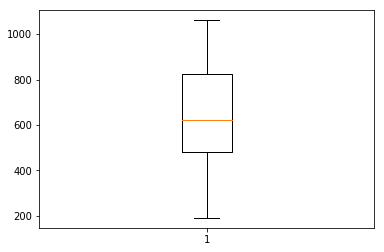

In [203]:
plt.boxplot(img_total_dish_df['total images'])

## Ingredient Classes Distribution

In [241]:
dir_vireofood172 = '../datasets/VireoFood172/'

dir_images = dir_vireofood172 + 'images/'
dir_annotations = dir_vireofood172 + 'meta/'

train_ingrs = open(dir_annotations+'train_ing_lbls.txt','r')

test_ingrs = open(dir_annotations+'test_ing_lbls.txt','r')

val_ingrs = open(dir_annotations+'val_ing_lbls.txt','r')

ingr_labels = []

for line in train_ingrs:
    for word in line.split(','):
        ingr_labels.append(word.replace('\n','').replace('_',' '))
        
for line in test_ingrs:
    for word in line.split(','):
        ingr_labels.append(word.replace('\n','').replace('_',' '))
        
for line in val_ingrs:
    for word in line.split(','):
        ingr_labels.append(word.replace('\n','').replace('_',' '))

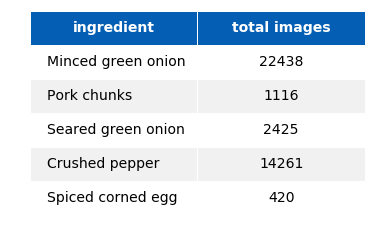

In [242]:
d = {'ingredient':ingr_labels, '#':np.ones(len(ingr_labels))}
img_ingr_df = pd.DataFrame(d)
img_total_ingr_df = img_ingr_df.merge(img_ingr_df.groupby('ingredient').count(), right_index=True,left_on='ingredient')
img_total_ingr_df = img_total_ingr_df[['ingredient','#_y']].drop_duplicates().reset_index(drop=True).rename(columns={'#_y':'total images'})
table_vireo172_ingr = render_mpl_table(img_total_ingr_df.head(),header_columns=0, col_width=3)
table_vireo172_ingr.figure.savefig('table_vireo172_ingr.jpeg')

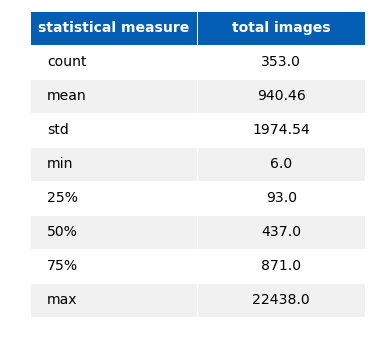

In [244]:
img_total_ingr_describe_df = img_total_ingr_df.describe().round(2)
img_total_ingr_describe_df['statistical measure'] = img_total_ingr_describe_df.index
table_vireo172_ingr_stats = render_mpl_table(img_total_ingr_describe_df[['statistical measure','total images']],header_columns=0, col_width=3)
table_vireo172_ingr_stats.figure.savefig('table_vireo172_ingr_stats.jpeg')

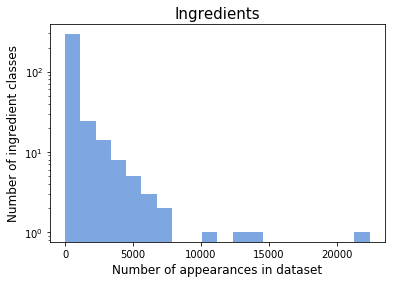

In [245]:
fig, ax = plt.subplots()
img_total_ingr_df.hist(bins=20, grid=False, figsize=(8,5), color='#7EA6E0', ax=ax)
plt.xlabel("Number of appearances in dataset", fontsize=12)
plt.ylabel("Number of ingredient classes",fontsize=12)
plt.title("Ingredients", fontsize=15)
plt.yscale('log')
fig.savefig('img_vireo172_ingr_hist.jpeg')

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6fcf02668>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6fcef5c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6fcf027f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6fcef53c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6fcef3f28>],
 'means': []}

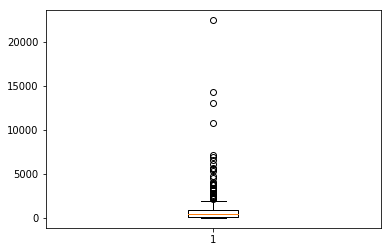

In [101]:
plt.boxplot(img_total_ingr_df['total_images'])